# MECANISMO BIELA-MANIVELA INVERTIDA

## PROBLEMAS VELOCIDAD Y ACELERACIÓN

### PASO 1: MATRIZ JACOBIANA 

Para resolver el problema velocidad, necesitamos otra vez la matriz jacobiana. El método de construcción aparece detallado en el notebook Problema_Posición_5B, por lo que para este caso copiaremos el código de los pasos realizados para poder conseguirla.

In [1]:
import numpy as np
import math as math
import array as arr
import pprint  # para depurar
import matplotlib.pyplot as plt  #Para graficas
import matplotlib.animation as animation
import scipy.integrate as integrate 
import os
from time import sleep
#%matplotlib inline (Para notebook)



print ('BIELA-MANIVELA INVERTIDA')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3: '))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["beta"] = float (input ('Introduce angulo inicial beta: '))
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["YB"] = float (input ('Introduce coordenada en y del punto B:'))
meca["XA"] = 0
meca["YA"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [0.2], [1], [0.2], [meca["XB"]+meca["L3"]*math.cos(meca["beta"])], [meca["YB"]+meca["L3"]*math.sin(meca["beta"])], [meca["theta"]], [meca["beta"]]])
print('q: ' + str(q))

# JACOBIANO
def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((8,8))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,4] = -2*(meca["XB"]-X3)
    Jacob[2,5] = -2*(meca["YB"]-Y3)
    Jacob[3,0] = -(Y2-Y1) + (Y3-Y1)
    Jacob[3,1] = (X2-X1) - (X3-X1)
    Jacob[3,2] = -(Y3-Y1)
    Jacob[3,3] = X3-X1
    Jacob[3,4] = (Y2-Y1)
    Jacob[3,5] = -(X2-X1)
	
    if (abs(math.cos(theta)) < 0.95 ):
        Jacob[4,6] = meca["L1"]*math.sin(theta)
        Jacob[4,0] = 1
    else:
        Jacob[4,6] = -meca["L1"]*math.cos(theta)
        Jacob[4,1] = 1


    if (abs(math.cos(beta)) < 0.95 ):
        Jacob[5,7] = meca["L3"]*math.sin(beta)
        Jacob[5,4] = 1
    else:
        Jacob[5,7] = -meca["L3"]*math.cos(beta)
        Jacob[5,5] = 1
		

    Jacob[6,6] = 1
    Jacob[7,7] = 1

    return Jacob


def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((8,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]

						
    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 - meca["L2"]**2
    Phi[2] = (meca["XB"]-X3)**2 + (meca["YB"]-Y3)**2 - meca["L3"]**2
    Phi[3] = (X3-X1)*(Y2-Y1) - (X2-X1)*(Y3-Y1)
     
    if (abs(math.cos(theta)) < 0.95):
        Phi[4] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[4] = Y1-meca["L1"]*math.sin(theta)
		

    if (abs(math.cos(beta)) < 0.95):
        Phi[5] = (X3-meca["XB"])-meca["L3"]*math.cos(beta)
    else: 
        Phi[5] = (Y3-meca["YB"])-meca["L3"]*math.sin(beta)


    return Phi



def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((8,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):
        #print("q=")
        #pprint.pprint(q)


        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        X3 = q[4]
        Y3 = q[5]
        theta = q[6]
        beta = q[7]
       
        fi=Phi(q,meca)

        J = jacob_Phiq(q,meca)
    
        rango = np.linalg.matrix_rank(J, 1e-5)
        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1

    return q

q = resuelve_prob_posicion(q,meca)

BIELA-MANIVELA INVERTIDA
Introduce longitud L1:1.5
Introduce longitud L2:2
Introduce longitud L3: 1
Introduce angulo inicial theta:0.5
Introduce angulo inicial beta: 0.5
Introduce coordenada en x del punto B:1.5
Introduce coordenada en y del punto B:0
q: [[0.1       ]
 [0.2       ]
 [1.        ]
 [0.2       ]
 [2.37758256]
 [0.47942554]
 [0.5       ]
 [0.5       ]]


### PASO 2: PROBLEMA VELOCIDAD

Consiste en determinar las velocidades de todas las variables del mecanismo una vez sabemos su posición $q$ y la velocidad de los grados de libertad. 

Partimos de la ecuación:

#Фq · q_p = -Ф_p$

Siendo $q_p$ el vector velocidad, $Фq$ el jacobiano y $Ф_p$ la derivada parcial de las ecuaciones de restricción respecto al tiempo. Para las ecuaciones de sólido rígido el valor de esta derivada es $0$. Solo tendría un valor no nulo la correspondiente al ángulo, que en ese caso tendría la velocidad que nosotros le indiquemos. 

En este caso vamos a tomar un valor de $1$. 

Por lo tanto, tendríamos:

$q_p = Фq/Ф_p$

In [2]:

#PASO 2

def resuelve_prob_velocidad(q,meca):
    
    b = np.zeros ((8,1))
    #Velocidad del gdl. En una vuelta completa del angulo se cumple angulo=2*Pi*t
    b[6]=1
    b[7] = 1
    qp = np.linalg.solve(jacob_Phiq(q,meca),b)
    #print ("qp=")
    #pprint.pprint(qp)
 
    return qp

resuelve_prob_velocidad (q,meca)

array([[-0.71913831],
       [ 1.31637384],
       [-0.8711085 ],
       [ 0.64360161],
       [-0.47942554],
       [ 0.87758256],
       [ 1.        ],
       [ 1.        ]])

### PASO 3: PROBLEMA ACELERACIÓN

El problema aceleración trata de determinar las aceleraciones de todas las variables del mecanismo, conociendo la posición$q$, la velocidad $q_p$ y las aceleraciones de los grados de libertad. 

La ecuación de la que partimos es:

$Фq · q_pp = -∂_Фq · q_p$

Siendo Фq el jacobiano, q_pp el vector aceleración, q_p el vector velocidad y ∂_Фq la derivada del jacobiano respecto al tiempo. 

Es decir, si llamamos &b& al conjunto $∂_Фq · q_p$ tendríamos como resultado:

$q_pp = -Фq/b$

El vector velocidad será:

\begin{equation}
\mathbf{q_p} = 
\begin{bmatrix}
X_1q \\
Y_1q \\
X_2q \\
Y_2q \\
X_3q \\
Y_3q \\
\theta_q\\
\beta_q \\
\end{bmatrix}
\end{equation}

Por otro lado, para calcular la derivada del jacobiano solo tenemos en cuenta las filas que hacen referencia a las ecuaciones de las coordenadas independientes, ya que la última que añadimos para poder realizar los cálculos era adicional. Teniendo en cuenta esto, la derivada del jacobiano sería:

¡¡¡¡ COMPLETAR !!!!

Como ya tenemos $∂_Фq$ y $q_p$, podemos calcular $b$. La última fila que añadimos es el valor de la aceleración angular, dato que sabemos de antemano. 

In [3]:
#PASO 3

def resuelve_prob_aceleracion (q,meca):

    b=np.zeros ((8,1))
    qp = resuelve_prob_velocidad (q,meca)
	
	#Extraer las posiciones
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
    #Extraer las velocidades
    X1q = qp[0]
    Y1q = qp[1]
    X2q = qp[2]
    Y2q = qp[3]
    X3q = qp[4]
    Y3q = qp[5]
    thetaq = qp[6]
    betaq = qp[7]
    
    b[0] = 2*(X1q)**2 + 2*(Y1q)**2
    b[1] = -2*X1q*(X2q-X1q) - 2*Y1q*(Y2q-Y1q) + 2*X2q*(X2q*X1q) + 2*Y2q*(Y2q*Y1q)
    b[2] = -2*X3q*(-X3q) + 2*X3q*Y3q 
    b[3] = -2*X1q*((Y2q-Y1q)+(Y3q-Y1q)) + Y1q*((X2q-X1q)-(X3q-X1q)) + X2q*(-Y3q-Y1q) + Y2q*(X3q-X1q) + X3q*(Y2q-Y1q) -Y3q*(X2q-X1q)
    
    if (abs(math.cos(theta)) < (math.sqrt(2)/2) ):
        b[4] = thetaq**2 * (meca["L1"] * math.cos(theta))
    else: 
        b[4] =  thetaq**2 * (meca["L1"] * math.sin(theta))
    
    if (abs(math.cos(beta)) < (math.sqrt(2)/2) ):
        b[5] = betaq**2 * (meca["L3"] * math.cos(beta))
    else: 
        b[5] =  betaq**2 * (meca["L3"] * math.sin(beta))
		
    b[6] = 1 #Aceleracion conocida 
    b[7] = 1
    qpp = np.linalg.solve(-jacob_Phiq(q,meca),b)

     
    return qpp

resuelve_prob_aceleracion(q, meca)

array([[ 0.        ],
       [-3.12874446],
       [ 0.93260767],
       [ 2.76063901],
       [-0.        ],
       [ 0.39815702],
       [-1.        ],
       [-1.        ]])

### PASO 4: GRÁFICAS DE VELOCIDADES

Vamos a representar por separado la gráfica de la velocidad en cada coordenada $(X_1, ~ Y_1, ~ X_2, ~ Y_2, ~ X_3 ~ e ~ Y_3)$.

VX1=
array([-0.81945373, -0.812726  , -0.79265326, -0.56290176, -0.7360779 ,
       -0.8971676 , -1.04352576, -1.17274919, -1.28271601, -1.37162057,
       -1.43800306, -1.48077346, -1.4992295 , -1.49306811, -1.46239047,
       -1.4077003 , -1.32989563, -1.23025401, -1.11041155, -0.97233609,
       -0.81829481, -0.6508171 , -0.47265294,  0.8043434 ,  0.81777046,
        0.81776969,  0.8043411 ,  0.47267385,  0.65083696,  0.81831328,
        0.97235287,  1.11042637,  1.23026662,  1.32990582,  1.40770791,
        1.46239537,  1.49307022,  1.49922879,  1.48076995,  1.43799679,
        1.37161165,  1.28270458,  1.17273545,  1.04350993,  0.89714994,
        0.73605869,  0.56288133, -0.79265632, -0.81272754, -0.81945373])


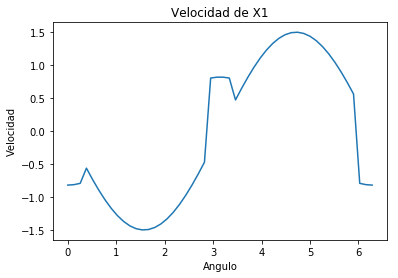

In [4]:
#PASO 4: VELOCIDAD DE X1

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX1 = np.append(VX1, qp[0])

        i=i+1
      
    print ("VX1=")
    pprint.pprint(VX1)
 
    plt.plot(th,VX1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X1')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY1=
array([ 1.5       ,  1.48768496,  1.45094207,  1.03038476,  1.34738155,
        1.64225427,  1.9101611 ,  2.14670299,  2.34799591,  2.51073462,
        2.63224694,  2.71053765,  2.74432119,  2.73304284,  2.67688779,
        2.57677812,  2.43435762,  2.25196485,  2.03259471,  1.77984927,
        1.49787861,  1.19131271,  0.8651854 , -1.47234071, -1.49691878,
       -1.49691737, -1.4723365 , -0.86522368, -1.19134906, -1.49791242,
       -1.77987998, -2.03262184, -2.25198794, -2.43437628, -2.57679205,
       -2.67689677, -2.73304671, -2.74431989, -2.71053121, -2.63223547,
       -2.51071829, -2.34797499, -2.14667783, -1.91013212, -1.64222194,
       -1.3473464 , -1.03034736,  1.45094766,  1.48768778,  1.5       ])


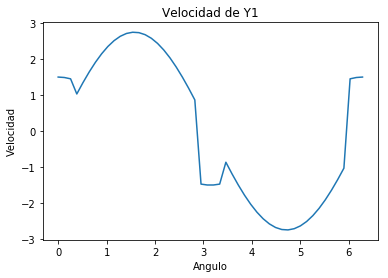

In [5]:
#PASO 4: VELOCIDAD DE Y1

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY1 = np.append(VY1, qp[1])

        i=i+1
      
    print ("VY1=")
    pprint.pprint(VY1)
 
    plt.plot(th,VY1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y1')

    plt.show()
    return 

grafica_velocidad (q,meca)

VX2=
array([-0.99262285, -0.98447339, -0.96015883, -0.68185563, -0.89162781,
       -1.08675941, -1.26404637, -1.42057762, -1.55378292, -1.66147503,
       -1.74188564, -1.7936944 , -1.81605061, -1.80858718, -1.77142666,
       -1.70517923, -1.61093267, -1.49023451, -1.34506664, -1.1778127 ,
       -0.99121902, -0.78834948, -0.57253519,  0.97431935,  0.99058386,
        0.99058292,  0.97431657,  0.57256053,  0.78837353,  0.99124139,
        1.17783303,  1.34508458,  1.49024979,  1.61094501,  1.70518845,
        1.7714326 ,  1.80858974,  1.81604975,  1.79369014,  1.74187804,
        1.66146423,  1.55376908,  1.42056098,  1.26402719,  1.08673801,
        0.89160455,  0.68183089, -0.96016253, -0.98447526, -0.99262285])


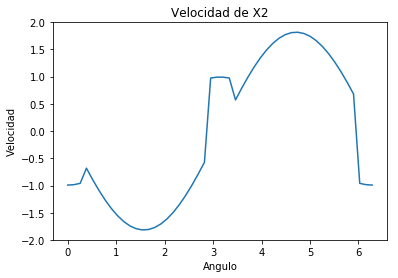

In [6]:
#PASO 4: VELOCIDAD DE X2

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX2 = np.append(VX2, qp[2])

        i=i+1
      
    print ("VX2=")
    pprint.pprint(VX2)
 
    plt.plot(th,VX2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X2')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY2=
array([ 0.73338012,  0.72735906,  0.70939472,  0.5037758 ,  0.6587619 ,
        0.8029311 ,  0.93391612,  1.0495662 ,  1.14798235,  1.22754858,
        1.28695839,  1.32523629,  1.34175374,  1.33623953,  1.3087842 ,
        1.25983857,  1.19020633,  1.10103084,  0.99377638,  0.87020405,
        0.73234293,  0.58245671,  0.42300652, -0.71985694, -0.73187365,
       -0.73187296, -0.71985488, -0.42302524, -0.58247448, -0.73235946,
       -0.87021907, -0.99378964, -1.10104213, -1.19021545, -1.25984538,
       -1.30878859, -1.33624143, -1.34175311, -1.32523314, -1.28695278,
       -1.22754059, -1.14797213, -1.0495539 , -0.93390195, -0.80291529,
       -0.65874471, -0.50375752,  0.70939745,  0.72736043,  0.73338012])


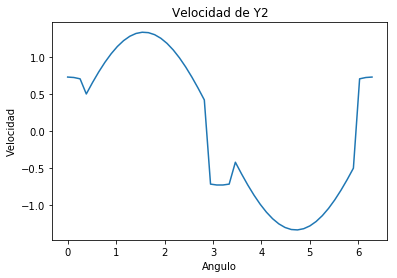

In [7]:
#PASO 4: VELOCIDAD DE Y2

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY2 = np.append(VY2, qp[3])

        i=i+1
      
    print ("VY2=")
    pprint.pprint(VY2)
 
    plt.plot(th,VY2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y2')

    plt.show()
    return 

grafica_velocidad (q,meca)

VX3=
array([-0.54630249, -0.54181733, -0.52843551, -0.37526784, -0.4907186 ,
       -0.59811173, -0.69568384, -0.78183279, -0.85514401, -0.91441372,
       -0.95866871, -0.98718231, -0.99948633, -0.99537874, -0.97492698,
       -0.93846687, -0.88659709, -0.82016934, -0.74027437, -0.64822406,
       -0.54552988, -0.43387807, -0.31510196,  0.53622893,  0.5451803 ,
        0.54517979,  0.5362274 ,  0.3151159 ,  0.4338913 ,  0.54554219,
        0.64823524,  0.74028425,  0.82017774,  0.88660388,  0.93847194,
        0.97493025,  0.99538015,  0.99948586,  0.98717996,  0.95866453,
        0.91440777,  0.85513639,  0.78182363,  0.69567329,  0.59809996,
        0.49070579,  0.37525422, -0.52843754, -0.54181836, -0.54630249])


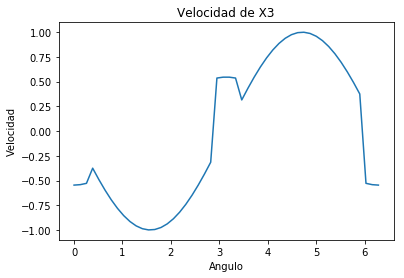

In [8]:
#PASO 4: VELOCIDAD DE X3

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX3 = np.append(VX3, qp[4])

        i=i+1
      
    print ("VX3=")
    pprint.pprint(VX3)
 
    plt.plot(th,VX3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X3')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY3=
array([ 1.        ,  0.99178998,  0.96729471,  0.68692317,  0.89825437,
        1.09483618,  1.27344073,  1.43113532,  1.5653306 ,  1.67382308,
        1.7548313 ,  1.8070251 ,  1.82954746,  1.82202856,  1.78459186,
        1.71785208,  1.62290508,  1.5013099 ,  1.35506314,  1.18656618,
        0.99858574,  0.79420847,  0.57679026, -0.98156048, -0.99794585,
       -0.99794491, -0.98155767, -0.57681579, -0.7942327 , -0.99860828,
       -1.18658666, -1.35508122, -1.50132529, -1.62291752, -1.71786137,
       -1.78459785, -1.82203114, -1.8295466 , -1.8070208 , -1.75482364,
       -1.67381219, -1.56531666, -1.43111856, -1.27342141, -1.09481463,
       -0.89823093, -0.68689824,  0.96729844,  0.99179185,  1.        ])


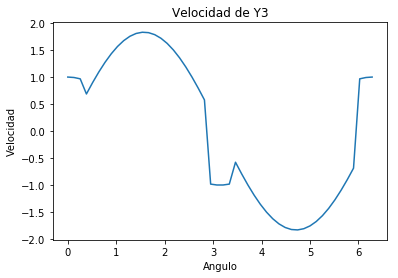

In [9]:
#PASO 4: VELOCIDAD DE Y3

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY3 = np.append(VY3, qp[5])

        i=i+1
      
    print ("VY3=")
    pprint.pprint(VY3)
 
    plt.plot(th,VY3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y3')

    plt.show()
    return 

grafica_velocidad (q,meca)

### PASO 5: GRÁFICAS ACELERACIONES

Haremos el mismo procedimiento que para la velocidad, representando en celdas separadas la aceleración de cada coordenada.

AX1=
array([-1.39990396e+00, -1.26554967e+00, -1.07605020e+00,  2.27639013e-16,
       -2.27639013e-16, -6.82917038e-16, -2.27639013e-16,  2.37516946e-01,
        5.05130234e-01,  7.64449260e-01,  1.01121599e+00,  1.24137851e+00,
        1.45115753e+00,  1.63710847e+00,  1.79617801e+00,  1.92575422e+00,
        2.02370945e+00,  2.08843527e+00,  2.11886888e+00, -2.27639013e-16,
        1.25201457e-15,  2.27639013e-16,  2.27639013e-16, -2.78596781e+00,
       -2.97552305e+00, -3.08052352e+00, -3.09924530e+00, -2.27639013e-16,
       -5.69097531e-16,  3.41458519e-16, -6.82917038e-16, -1.01985356e-01,
       -3.72103431e-01, -6.36111549e-01, -8.89674684e-01, -1.12862932e+00,
       -1.34905180e+00, -1.54732279e+00, -1.72018666e+00, -1.86480498e+00,
       -1.97880312e+00, -2.06030921e+00, -2.10798492e+00,  0.00000000e+00,
        0.00000000e+00, -2.27639013e-16,  1.13819506e-16, -1.49176884e+00,
       -1.47512378e+00, -1.39989192e+00])


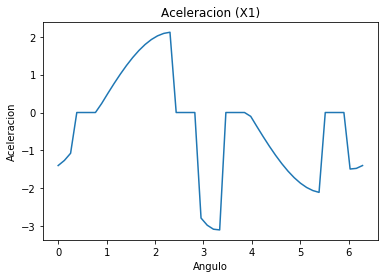

In [10]:
#PASO 5: ACELERACION DE X1

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    AX1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX1 = np.append(AX1, qpp[0])

        i=i+1
      
    print ("AX1=")
    pprint.pprint(AX1)	
 
    plt.plot(th,AX1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X1)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY1=
array([ -1.5       ,  -1.67950115,  -1.83142481,  -1.91694855,
        -3.2778781 ,  -4.86959011,  -6.58796979,  -8.75538877,
       -10.87883274, -12.78117467, -14.36123613, -15.53779357,
       -16.25452787, -16.48336929, -16.22602462, -15.51359173,
       -14.40429121, -12.97946735, -11.33812309,  -5.71976326,
        -4.05102425,  -2.56249576,  -1.35154331,   1.18561292,
         1.40082422,   1.59303392,   1.75908592,  -1.35166293,
        -2.56265213,  -4.05120713,  -5.7199607 ,  -7.27307576,
        -8.47566917,  -9.53568557, -10.36011334, -10.8722875 ,
       -11.01727781, -10.76583366, -10.11662187,  -9.09660594,
        -7.75953682,  -6.18265002,  -4.46178142,  -6.58776989,
        -4.86939838,  -3.27770707,  -1.91680941,  -1.07048623,
        -1.29589345,  -1.50002204])


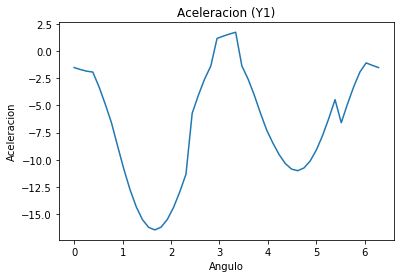

In [11]:
#PASO 5: ACELERACION DE Y1

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY1 = np.append(AY1, qpp[1])

        i=i+1
      
    print ("AY1=")
    pprint.pprint(AY1)	
 
    plt.plot(th,AY1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y1)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AX2=
array([-1.601809  , -1.44060106, -1.21557044,  0.57137082,  0.97706621,
        1.45159529,  1.96392401,  2.76824951,  3.57952062,  4.31936299,
        4.9547615 ,  5.4587886 ,  5.81212699,  6.00411028,  6.03321679,
        5.90698776,  5.64137804,  5.25958467,  4.79043205,  1.70506695,
        1.20755589,  0.76380542,  0.40283322, -3.28480576, -3.51139691,
       -3.63858652, -3.66428638,  0.40274939,  0.76354013,  1.20699044,
        1.7040857 ,  2.09877132,  2.27702771,  2.41686443,  2.4934776 ,
        2.48681899,  2.38315242,  2.17618357,  1.86768545,  1.46757546,
        0.99343569,  0.46950514, -0.07479289,  1.96257882,  1.45072115,
        0.97656405,  0.57112758, -1.71913916, -1.69446258, -1.60179442])


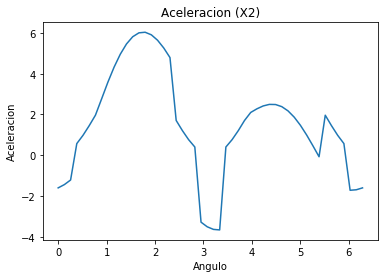

In [12]:
#PASO 5: ACELERACION DE X2

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AX2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX2 = np.append(AX2, qpp[2])

        i=i+1
      
    print ("AX2=")
    pprint.pprint(AX2)	
 
    plt.plot(th,AX2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X2)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY2=
array([-0.10779996, -0.205791  , -0.31008847,  1.69142057,  2.89222549,
        4.29665103,  5.81283175,  7.12902487,  8.3308681 ,  9.3584423 ,
       10.13316585, 10.59354644, 10.69938051, 10.43454847,  9.80821992,
        8.85438781,  7.62975965,  6.21014194,  4.68555254,  5.04678668,
        3.57440154,  2.26101473,  1.19253753,  1.18252628,  1.30804374,
        1.40201775,  1.4629053 ,  1.19267007,  2.26122316,  3.57470294,
        5.04719583,  6.67365873,  8.41287258, 10.01094478, 11.37491758,
       12.42668779, 13.10793343, 13.38375698, 13.24480952, 12.70775961,
       11.81407835, 10.62722236,  9.22840055,  5.81294577,  4.2966664 ,
        2.8921765 ,  1.69134338,  0.06195419, -0.01823516, -0.10781073])


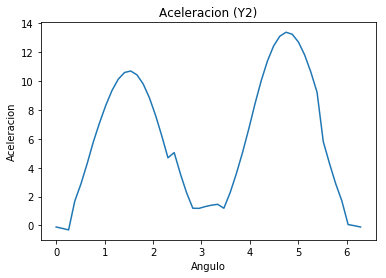

In [13]:
#PASO 5: ACELERACION DE Y2

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY2 = np.append(AY2, qpp[3])

        i=i+1
      
    print ("AY2=")
    pprint.pprint(AY2)	
 
    plt.plot(th,AY2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y2)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AX3=
array([ 8.28732987e-01,  8.89489119e-01,  9.31266610e-01,  6.32546197e-17,
        3.16273099e-17,  1.26509239e-16, -0.00000000e+00,  1.58344630e-01,
        3.36753490e-01,  5.09632840e-01,  6.74143994e-01,  8.27585671e-01,
        9.67438350e-01,  1.09140564e+00,  1.19745200e+00,  1.28383614e+00,
        1.34913963e+00,  1.39229018e+00,  1.41257925e+00, -0.00000000e+00,
        3.16273099e-17,  3.16273099e-17, -0.00000000e+00, -1.59691435e-01,
       -2.28911125e-01, -2.98914747e-01, -3.68552810e-01, -1.58136549e-17,
       -0.00000000e+00,  3.16273099e-17, -6.32546197e-17, -6.79902374e-02,
       -2.48068954e-01, -4.24074366e-01, -5.93116456e-01, -7.52419545e-01,
       -8.99367868e-01, -1.03154853e+00, -1.14679111e+00, -1.24320332e+00,
       -1.31920208e+00, -1.37353947e+00, -1.40532328e+00, -0.00000000e+00,
       -0.00000000e+00,  3.16273099e-17,  1.58136549e-17,  6.54133551e-01,
        7.49779610e-01,  8.28741014e-01])


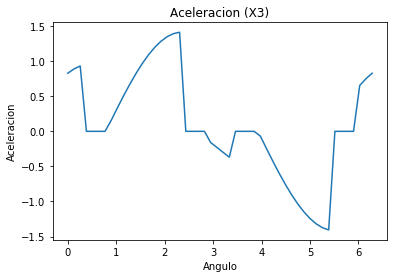

In [14]:
#PASO 5: ACELERACION DE X3

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AX3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX3 = np.append(AX3, qpp[4])

        i=i+1
      
    print ("AX3=")
    pprint.pprint(AX3)	
 
    plt.plot(th,AX3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X3)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY3=
array([-1.        , -1.11966743, -1.22094987,  0.24394659,  0.41713544,
        0.61969315,  0.8383703 ,  0.7690152 ,  0.65032585,  0.51555335,
        0.35801002,  0.17324806, -0.04040727, -0.28152214, -0.54544207,
       -0.82441377, -1.10793616, -1.38332008, -1.63642211,  0.72788428,
        0.51552429,  0.32609748,  0.17199438,  0.79040862,  0.93388282,
        1.06202261,  1.17272395,  0.1720096 ,  0.32611738,  0.51554756,
        0.72790941,  1.0737675 ,  1.61936105,  2.13793116,  2.61134142,
        3.0237849 ,  3.36256919,  3.61871204,  3.78731249,  3.86767686,
        3.86319438,  3.78097355,  3.63126529,  0.83834486,  0.61966875,
        0.41711367,  0.24392888, -0.71365749, -0.86392897, -1.00001469])


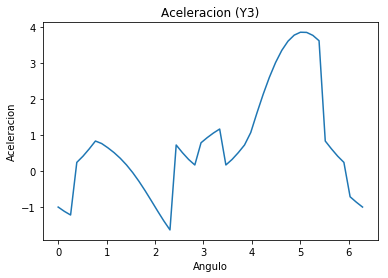

In [15]:
#PASO 5: ACELERACION DE Y3

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY3 = np.append(AY3, qpp[5])

        i=i+1
      
    print ("AY3=")
    pprint.pprint(AY3)	
 
    plt.plot(th,AY3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y3)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)